### 9a 
Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). 

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [2]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

shapes = [X_train, y_train, X_test, y_test]
for s in shapes:
    print(s.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 9b
Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. 

In [3]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [5]:
print(f"training time: {(t1-t0):.2f}s")

training time: 27.73s


In [6]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9705

### 9c
Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

154
0.9501960192613034


### 9d

Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? 

In [8]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [9]:
print(f"training time: {(t1-t0):.2f}s")

training time: 71.47s


Reducing dimensions increased training time. Complex decision boundries in MNIST. Think about figure 8-6 on page 219.

### 9e

Next evaluate the classifier on the test set: how
does it compare to the previous classifier?

In [10]:
X_test_reduced = pca.transform(X_test)

print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

154
0.9501960192613034


0.9481

Accuracy decreased comapred to full dimensional RF. This is common due to useful information being lost when reducing dimensions. Additionally, the RF may not be the best model for the job.  

### 9f

Try softmax regression on MNIST data. 

In [18]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200, random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/home/mlr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(f"training time: {(t1-t0):.2f}s")

training time: 134.22s


In [21]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9225

In [27]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200, random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()


/home/mlr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(f"training time: {(t1-t0):.2f}s")

training time: 27.62s


In [30]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9202

Reducing dimensions with PCA decreased training by a factor of 4 with a slight drop in accuracy. 

Think about how PCA can affect training time and accuracy. 

Note: look into iteration limit warning from softmax regression. 

### 10a

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.

Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images.

In [79]:
np.random.seed(42)

m = 1000
idx = np.random.permutation(60000)[:m]

print(idx[0:4])

X = mnist['data'][idx]
y = mnist['target'][idx]

print(X[1])
print(y[1])

[12628 37730 39991  8525]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 128. 255. 191. 191. 128.
 128.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 128. 255. 255. 255. 255.
 255. 255. 128.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 128. 255. 255. 255. 255.
 255. 255. 255.  64.   0.   0.   0.   0.   0.   0. 

### 10b

Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset.

t-SNE = t-Distributed Stochastic Neighbor Embedding 

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

tsne.embedding_.shape

(1000, 2)

### 10c

Now let's use Matplotlib's scatter() function to plot a scatterplot, using a different color for each digit.

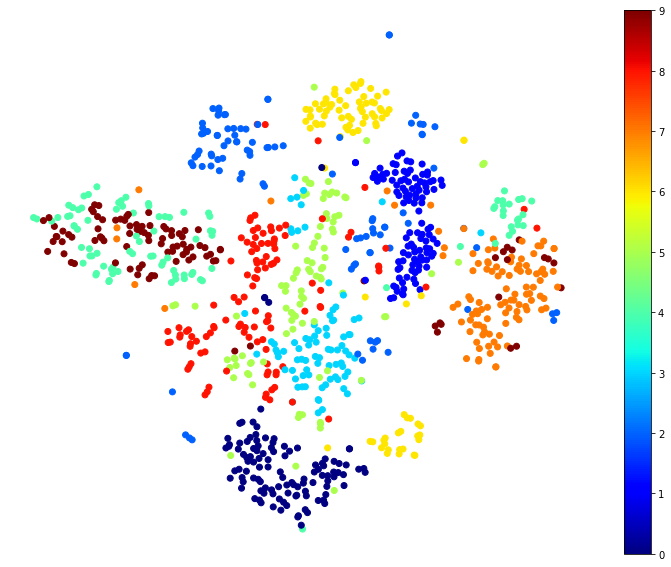

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Note how 0, 1, 6, 7 appear to be well seperated clusters. 3, 3, 5, 8, and 9 overlap and are hard to distinguish. 

### 10d

Let's focus on digits 3 and 5, which seem to overlap a lot.

Note that X and y arrays both have the same idx. Boolean mask on y can be used to find corresponding X idx.

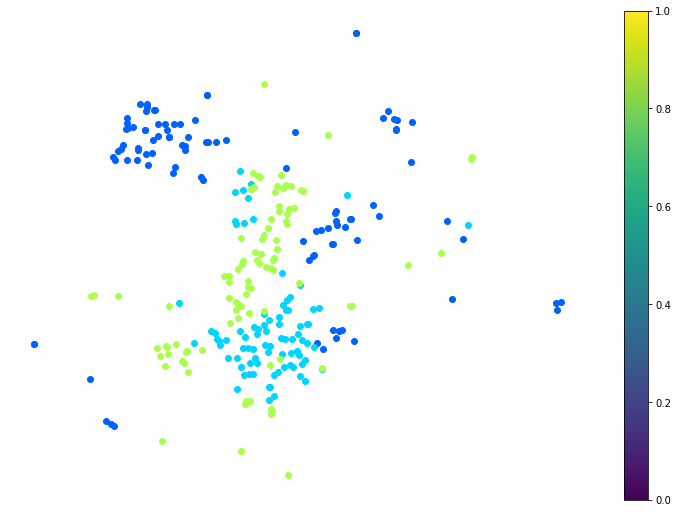

In [82]:
plt.figure(figsize=(13,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.colorbar()
plt.show()

### 10e

Let's see if we can produce a nicer image by running t-SNE on these 3 digits.

In [83]:
# boolean or selection of idx
idx = (y ==2)|(y==3)|(y==5)

print(idx[:4])

X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

[False  True False False]


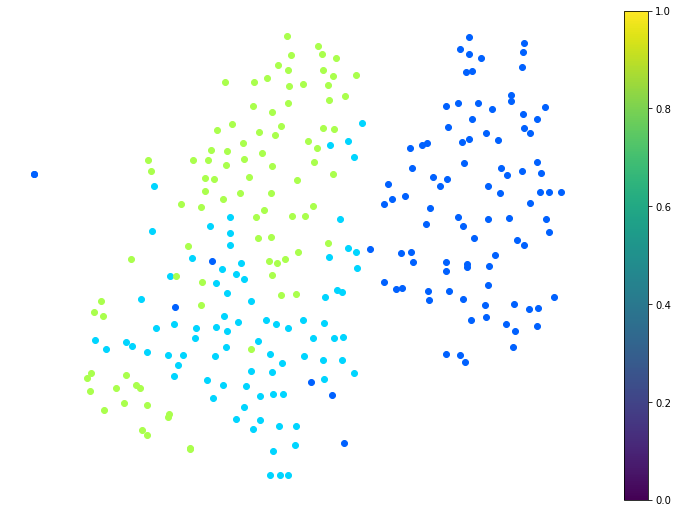

In [84]:
plt.figure(figsize=(13,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.colorbar()
plt.show()

Better distribution of 2, 3, and 5. Still some overlap between 2 and 3, with two cluster of 5. t-SNE successfully seperated dimensions while preserving distance between similiar instances. 

### 10f

Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset).

In [85]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

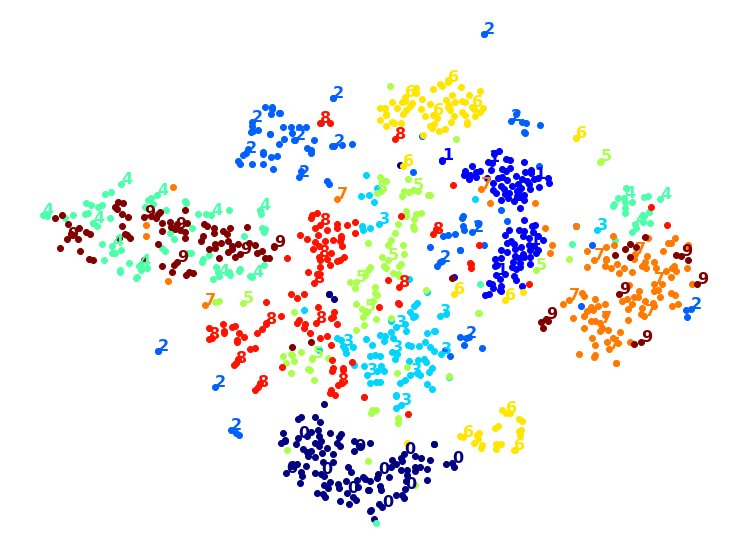

In [86]:
plot_digits(X_reduced, y)

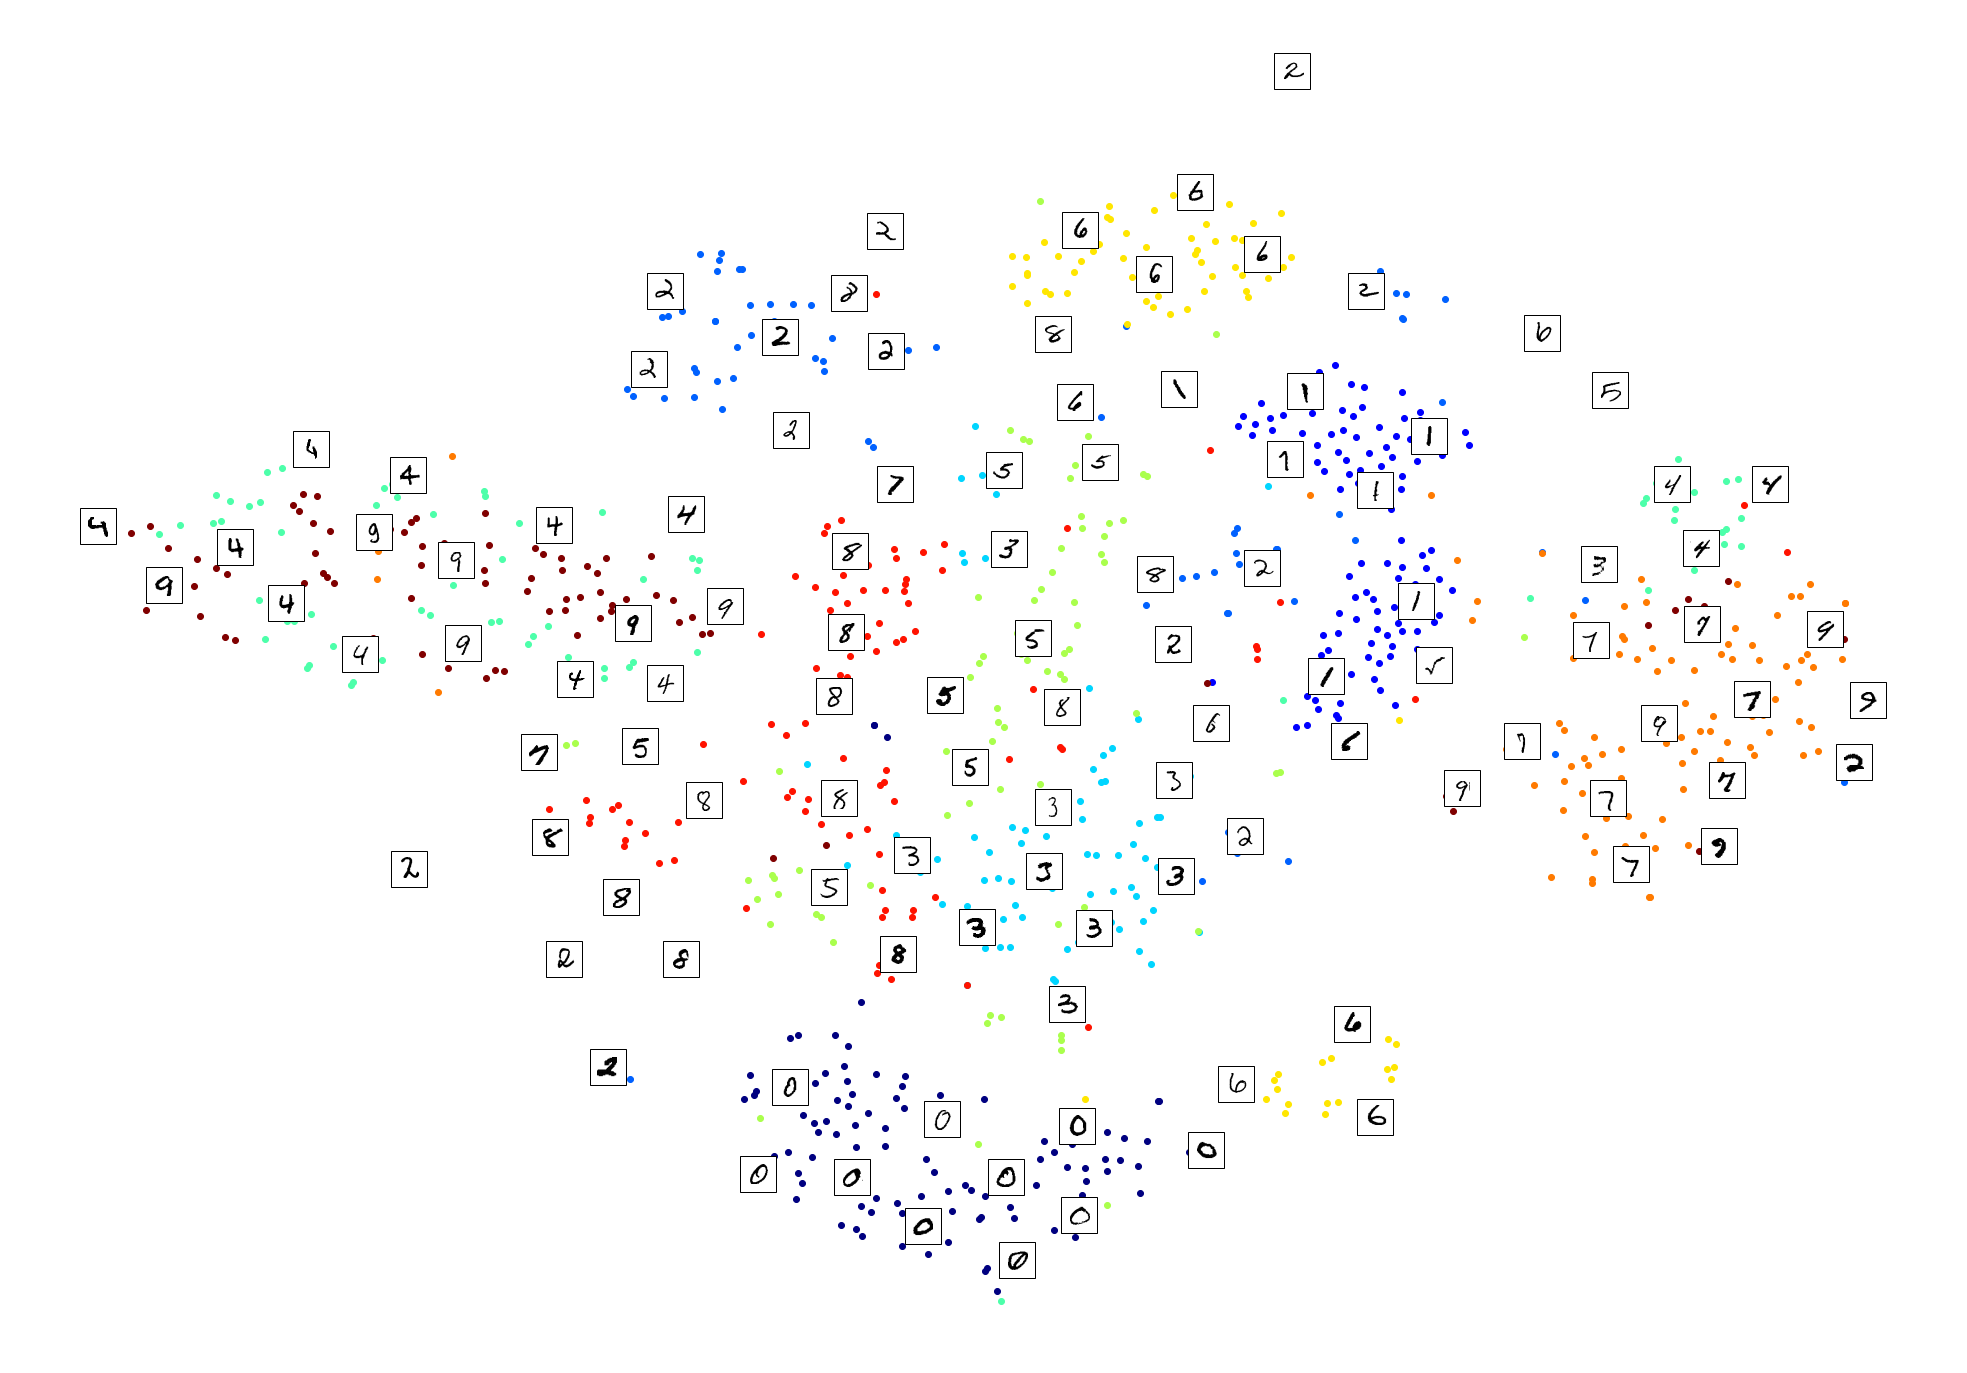

In [87]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

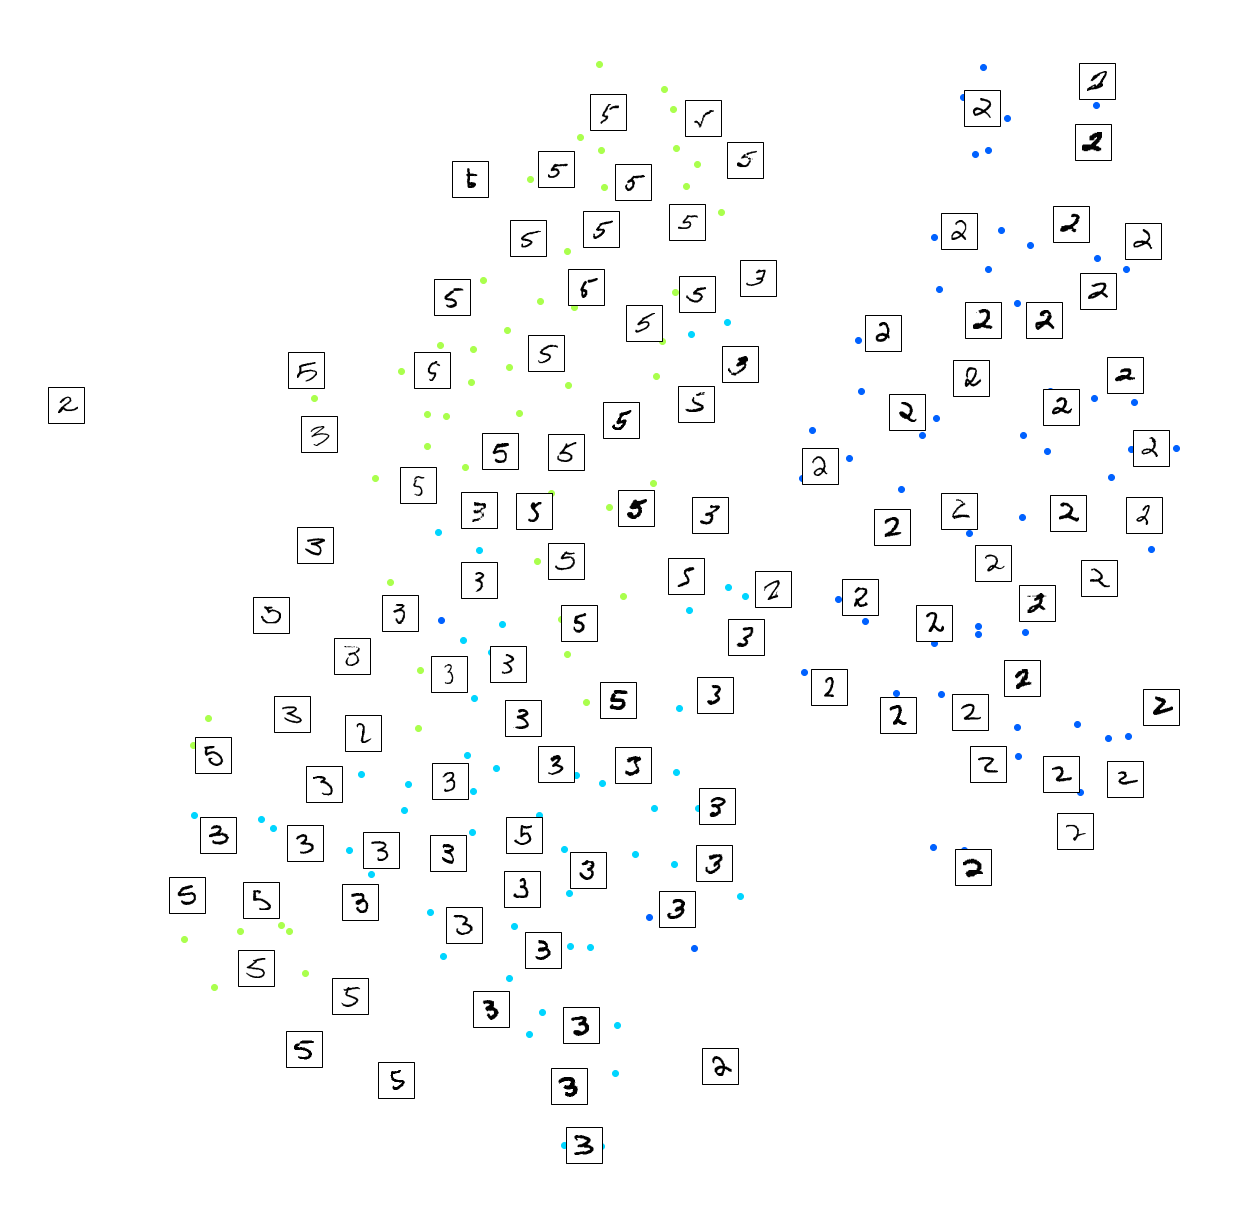

In [88]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

## 10g

Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

Let's start with PCA. We will also time how long it takes.

LLE took 1.0s.


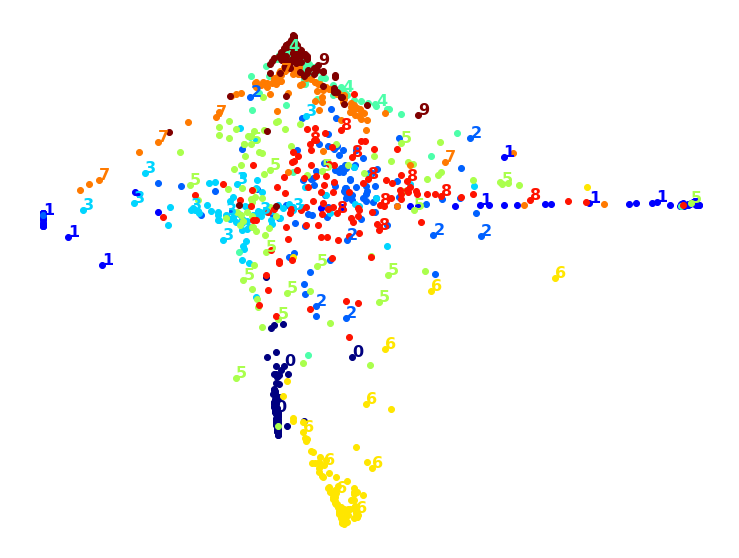

In [89]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

### 10h

Let's see what happens if we apply PCA first, preserving 95% of the variance.

PCA+LLE took 0.4s.


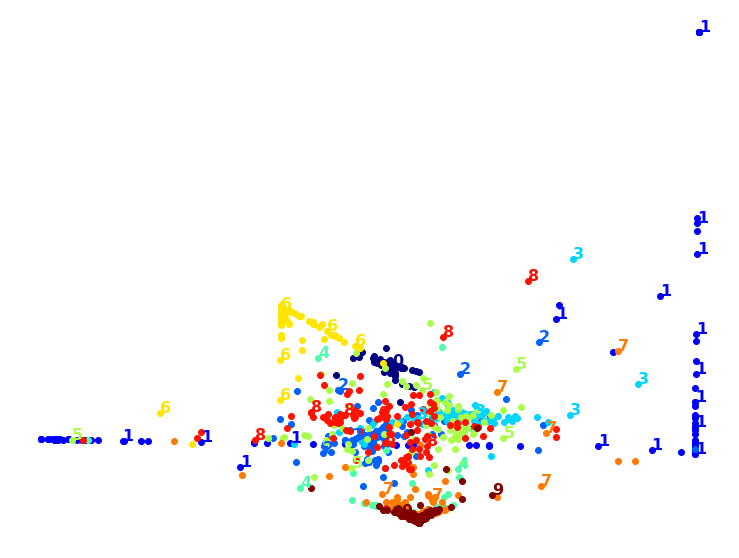

In [90]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

Pipeline ran faster by a factor of 4. LLE creates a strange image, but the seperation is there.

### 10i

Let's try MDS. It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now.

MDS took 2.6s (on just 200 MNIST images instead of 1,000).


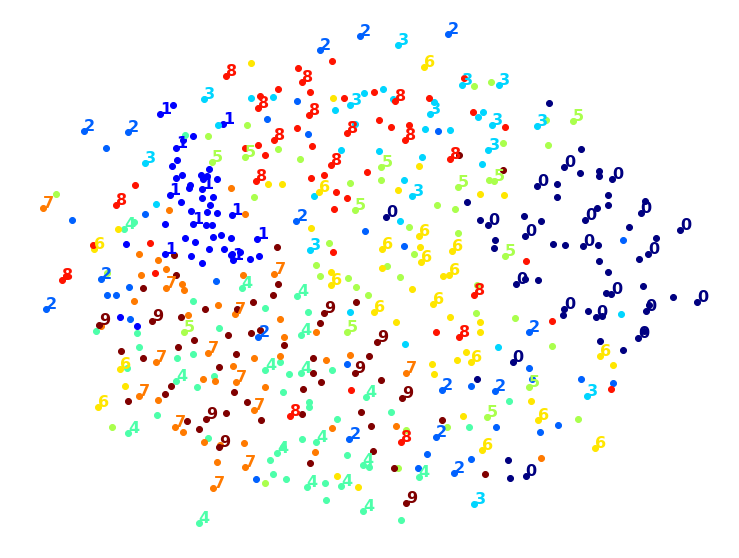

In [92]:
from sklearn.manifold import MDS

m = 500
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 200 MNIST images instead of 1,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

Not the best result, lots of overlap. Run it in a pipeline with PCA.

## 10j

Lets try LDA.

LDA took 0.2s.


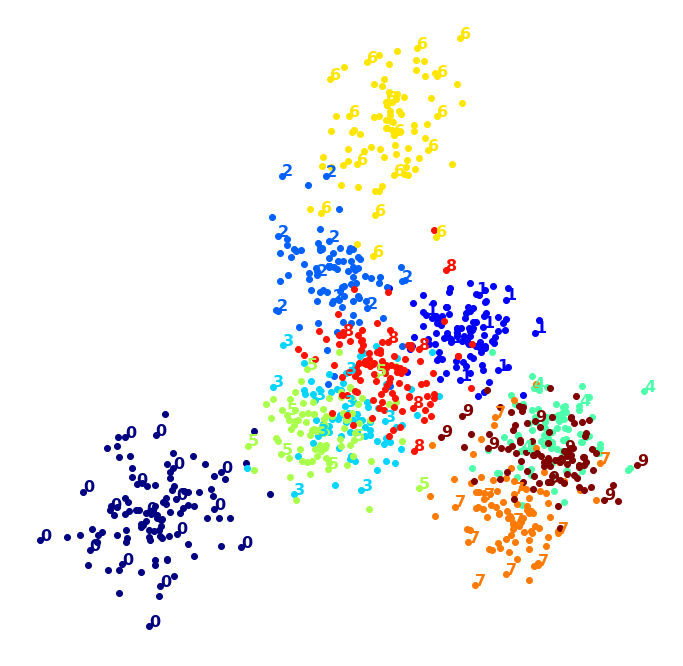

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

Very fast. Several clusters have lots of overlap.

## 10k

Back to t-SNE with base MNIST data. Lets try and imporve it with PCA in a pipeline. 

PCA+t-SNE took 2.0s.


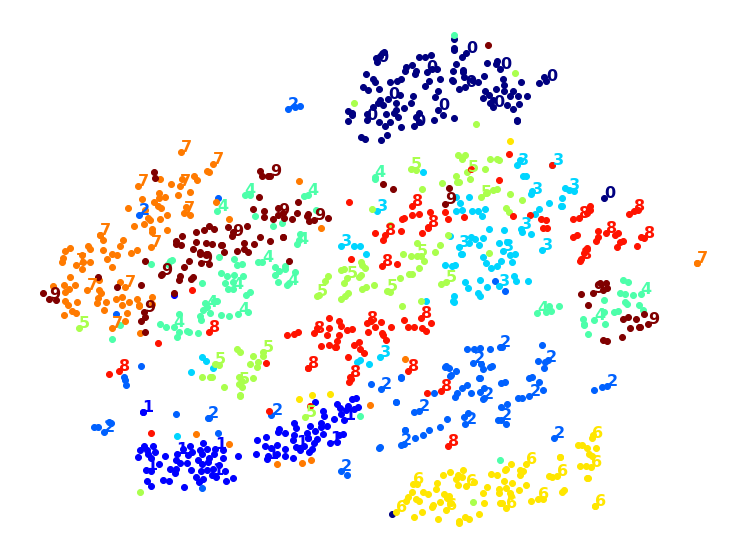

In [97]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

PCA in a pipe sped up dimension reduction by a fair amount and preserved clusters. In this case PCA+TSNE produced to best result.